# Assignment 3
Given a bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months. Dataset Description: The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc. Link to the Kaggle project: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling <br>
Perform following steps:
1. Read the dataset.
2. Distinguish the feature and target set and divide the data set into training and test sets.
3. Normalize the train and test data. 4. Initialize and build the model. Identify the points of improvement and implement the same.
4. Print the accuracy score and confusion matrix (5 points).

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [39]:
df = pd.read_csv('./datasets/churn_modelling.csv', index_col='RowNumber')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [40]:
X = df.drop(["CustomerId", "Surname", "Exited"], axis=1)
Y = df["Exited"]

In [41]:
pipeline = Pipeline(
    [
        ('Categorizer', ColumnTransformer(
            [
                ("Gender Label Encoder", OneHotEncoder(categories = 'auto', drop = 'first'), [2]),
                ("Geography Label Encoder", OneHotEncoder(categories = 'auto', drop = 'first'), [1])
            ], 
            remainder = 'passthrough', n_jobs = 1)),
        ('Normalizer', StandardScaler())
    ]
)

In [42]:
X = pipeline.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [43]:
classifier = Sequential([
	Dense(6, activation = 'relu', input_shape = (X_train.shape[1], )),
	Dropout(rate = 0.1),
	Dense(6, activation = 'relu'),
	Dropout(rate = 0.1),
	Dense(1, activation = 'sigmoid')
])
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 6)                 72        
                                                                 
 dropout_4 (Dropout)         (None, 6)                 0         
                                                                 
 dense_7 (Dense)             (None, 6)                 42        
                                                                 
 dropout_5 (Dropout)         (None, 6)                 0         
                                                                 
 dense_8 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
history = classifier.fit(X_train, y_train, batch_size=32, epochs=200, validation_split=0.1, verbose=1)

Epoch 1/200


211/211 [==============================] - 2s 3ms/step - loss: 0.5677 - accuracy: 0.7625 - val_loss: 0.5325 - val_accuracy: 0.7773
Epoch 2/200
211/211 [==============================] - 1s 3ms/step - loss: 0.5009 - accuracy: 0.7898 - val_loss: 0.5092 - val_accuracy: 0.7773
Epoch 3/200
211/211 [==============================] - 1s 3ms/step - loss: 0.4738 - accuracy: 0.7964 - val_loss: 0.4918 - val_accuracy: 0.7773
Epoch 4/200
211/211 [==============================] - 1s 2ms/step - loss: 0.4592 - accuracy: 0.7970 - val_loss: 0.4783 - val_accuracy: 0.7773
Epoch 5/200
211/211 [==============================] - 1s 2ms/step - loss: 0.4502 - accuracy: 0.8027 - val_loss: 0.4693 - val_accuracy: 0.7827
Epoch 6/200
211/211 [==============================] - 1s 3ms/step - loss: 0.4434 - accuracy: 0.8111 - val_loss: 0.4658 - val_accuracy: 0.7853
Epoch 7/200
211/211 [==============================] - 1s 3ms/step - loss: 0.4368 - accuracy: 0.8145 - val_loss: 0.4601 - val_accuracy: 0.7973
Epoch 8/200

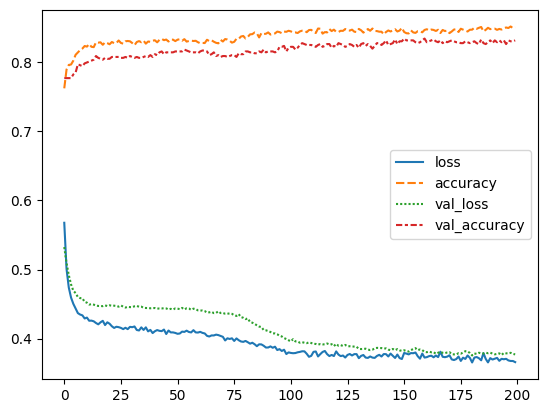

In [45]:
sns.lineplot(history.history)
plt.show()

In [46]:
y_pred = classifier.predict(X_test)
pd.DataFrame(y_pred).head()

79/79 [==============================] - 0s 2ms/step


,0
0,0.069995
1,0.103899
2,0.077305
3,0.068402
4,0.136267


In [47]:
cm = confusion_matrix(y_test, (y_pred > 0.5).astype(int))
print(cm)

[[1948   32]
 [ 328  192]]


In [48]:
print(((cm[0][0] + cm[1][1])* 100) / len(y_test), '% of data was classified correctly')

85.6 % of data was classified correctly
